#**ASSIGNMENT 2 SOLUTION AT THE END OF THIS NOTEBOOK**

# Linear Regression Assignment: Insurance Dataset

## Problem Statement
You have been provided with an **insurance dataset** that contains information about individuals, such as age, BMI, smoking status, and insurance charges. Your objective is to perform **Exploratory Data Analysis (EDA)** and build a **Linear Regression model** to predict the insurance charges based on the given features.

---

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data_path = "/content/drive/MyDrive/0.Latest_DS_Course/Assignments/LinearRegression/Assignment1/insurance.csv"

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder



## Section 1: Data Inspection and Cleaning (10 Marks)
### Q1. Load the dataset and display the first five rows.
- Identify the columns present in the dataset.
- Check for missing values and data types.


In [ ]:
df = pd.read_csv(data_path)
df.head()


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
df.shape

(1338, 7)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


### Q2. Handle missing values and duplicates if any.
- Remove or impute missing values appropriately.
- Drop duplicate records if found.

---

In [ ]:
df.isna().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


In [ ]:
df.duplicated().sum()

np.int64(1)

In [ ]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

np.int64(0)

In [ ]:
# convert smokers sex into 0 1
df["smoker"].replace({"yes":1,"no":0},inplace=True)
df["sex"].replace({"male":1,"female":0},inplace=True)

<ipython-input-226-d30dbcbe2a54>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["smoker"].replace({"yes":1,"no":0},inplace=True)
<ipython-input-226-d30dbcbe2a54>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["smoker"].replace({"yes":1,"no":0},inplace=True)
<ipython-input-226-d30dbcbe2a54>

In [ ]:
# Create a LabelEncoder object
label_encoder = LabelEncoder()

# Fit and transform the data
df['region'] = label_encoder.fit_transform(df['region'])
print(dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_))))
# region_mapping = dict(zip(label_encoder.transform(label_encoder.classes_), label_encoder.classes_))


{'northeast': np.int64(0), 'northwest': np.int64(1), 'southeast': np.int64(2), 'southwest': np.int64(3)}


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   int64  
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   int64  
 5   region    1337 non-null   int64  
 6   charges   1337 non-null   float64
dtypes: float64(2), int64(5)
memory usage: 83.6 KB


In [ ]:
df.select_dtypes(include='number').describe()


,age,sex,bmi,children,smoker,region,charges
count,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,0.504862,30.663452,1.095737,0.204936,1.516081,13279.121487
std,14.044333,0.500163,6.100468,1.205571,0.403806,1.105208,12110.359656
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.290000,0.000000,0.000000,1.000000,4746.344000
50%,39.000000,1.000000,30.400000,1.000000,0.000000,2.000000,9386.161300
75%,51.000000,1.000000,34.700000,2.000000,0.000000,2.000000,16657.717450
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010


## Section 2: Exploratory Data Analysis (20 Marks)
### Q3. Perform Univariate Analysis on all numerical columns.
- Plot histograms and boxplots for each numerical column.
- Write your observations about the distribution of the data.


#Univariate - Numerical Columns

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

def histogram_boxplot(df, column):
    """Creates a side-by-side histogram and boxplot for a given column."""
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))  # 1 row, 2 columns

    # Histogram
    sns.histplot(df[column], bins=20, kde=True, ax=axes[0])
    axes[0].set_title(f'Histogram of {column}')
    axes[0].set_xlabel(column)

    # Boxplot
    sns.boxplot(x=df[column], ax=axes[1])
    axes[1].set_title(f'Boxplot of {column}')

    plt.tight_layout()
    plt.show()

    print(df[column].describe())



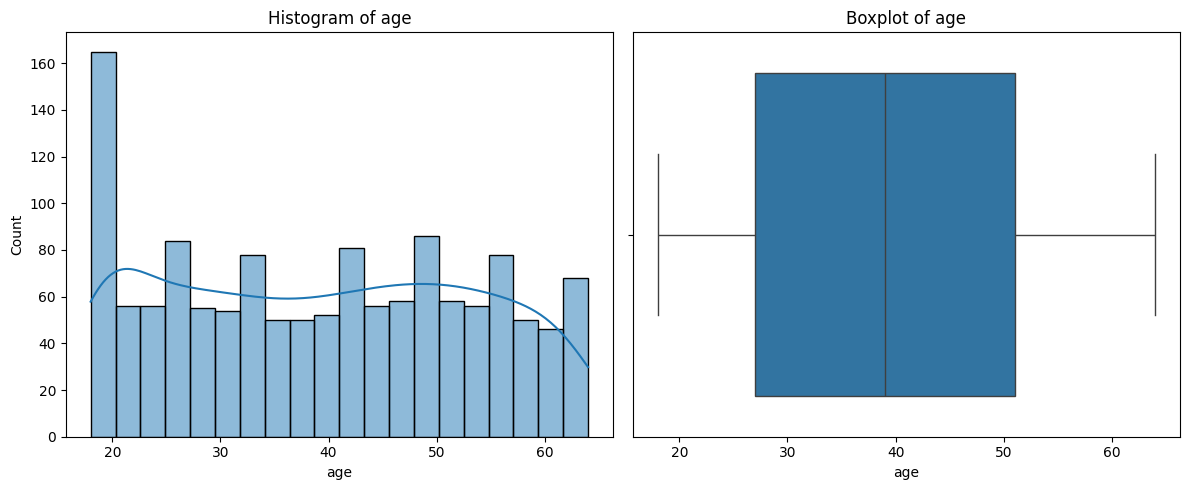

count    1337.000000
mean       39.222139
std        14.044333
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64


In [ ]:
histogram_boxplot(df,"age")

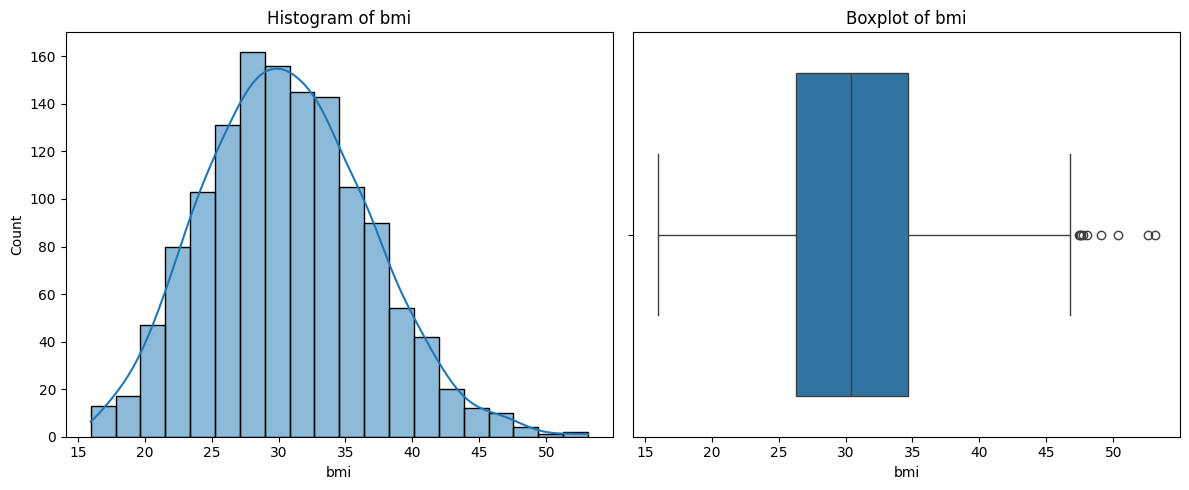

count    1337.000000
mean       30.663452
std         6.100468
min        15.960000
25%        26.290000
50%        30.400000
75%        34.700000
max        53.130000
Name: bmi, dtype: float64


In [ ]:
histogram_boxplot(df,"bmi")

#Univariage - Categorical Columns

In [ ]:
def analyze_categorical_column(df, column_name):
    """
    Performs univariate analysis on a categorical column.
    - Displays a countplot
    - Prints value counts as percentage
    """
    # Count Plot
    plt.figure(figsize=(8, 5))
    sns.countplot(data=df, x=column_name, order=df[column_name].value_counts().index, palette='Set2')
    plt.title(f'Count Plot of {column_name}')
    plt.xlabel(column_name)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    # Value Counts as Percentage
    value_percent = df[column_name].value_counts(normalize=True) * 100
    print(f"\nPercentage distribution of '{column_name}':")
    print(value_percent.round(2).astype(str) + ' %')

<ipython-input-233-268e0e6e3b24>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=column_name, order=df[column_name].value_counts().index, palette='Set2')


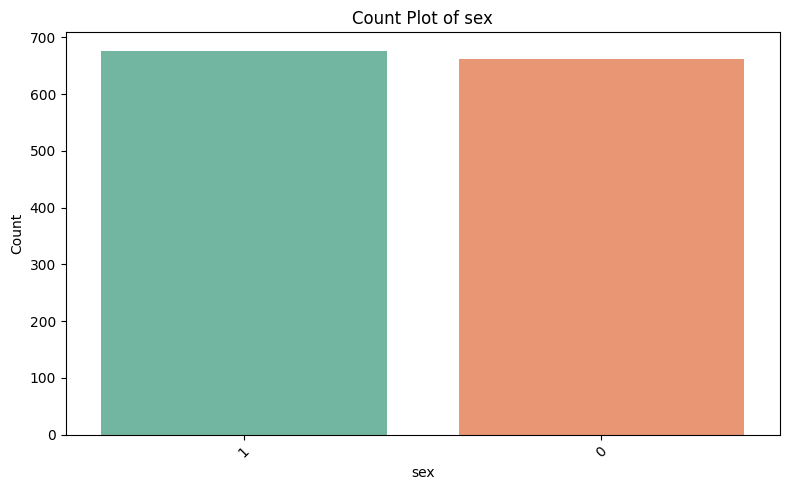


Percentage distribution of 'sex':
sex
1    50.49 %
0    49.51 %
Name: proportion, dtype: object


In [ ]:
analyze_categorical_column(df, 'sex')


<ipython-input-233-268e0e6e3b24>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=column_name, order=df[column_name].value_counts().index, palette='Set2')


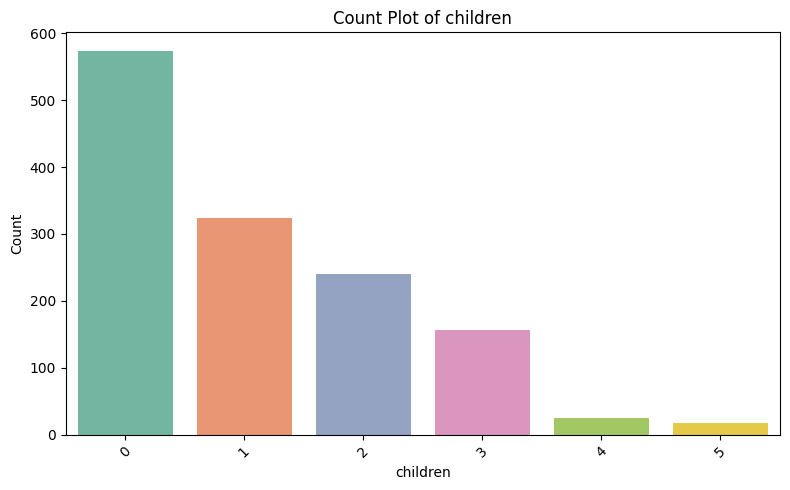


Percentage distribution of 'children':
children
0    42.86 %
1    24.23 %
2    17.95 %
3    11.74 %
4     1.87 %
5     1.35 %
Name: proportion, dtype: object


In [ ]:
analyze_categorical_column(df, 'children')


<ipython-input-233-268e0e6e3b24>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=column_name, order=df[column_name].value_counts().index, palette='Set2')


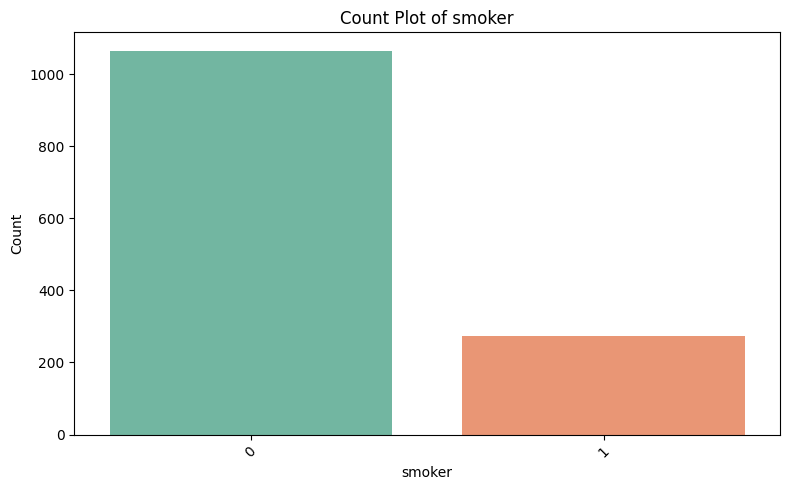


Percentage distribution of 'smoker':
smoker
0    79.51 %
1    20.49 %
Name: proportion, dtype: object


In [ ]:
analyze_categorical_column(df, 'smoker')


<ipython-input-233-268e0e6e3b24>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=column_name, order=df[column_name].value_counts().index, palette='Set2')


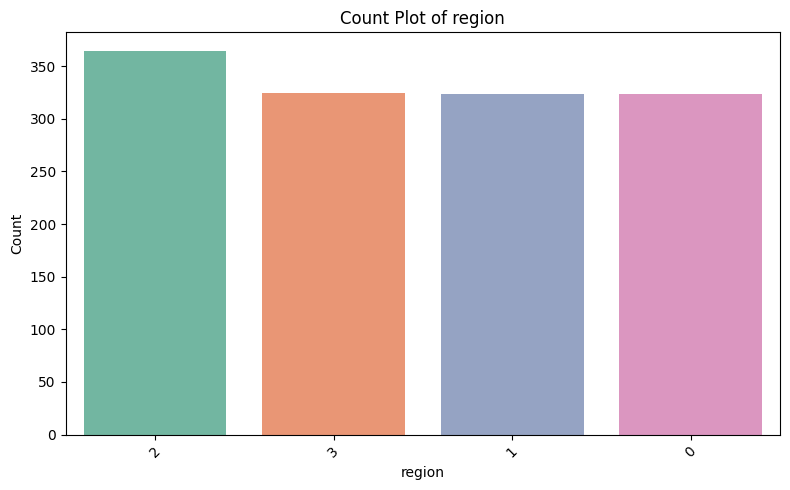


Percentage distribution of 'region':
region
2    27.23 %
3    24.31 %
1    24.23 %
0    24.23 %
Name: proportion, dtype: object


In [ ]:
analyze_categorical_column(df, 'region')


### Q4. Perform Bivariate Analysis.
- Use scatter plots to analyze relationships between independent variables and insurance charges.
- Provide insights based on your observations.

#Bivariate - Numerical Vs Numerical

In [ ]:


def plot_boxplot(df, column, target='charges'):
    """
    Creates a Scatter for a numerical column against the target column.

    Parameters:
        df (pd.DataFrame): The dataset.
        column (str): The numerical column to plot.
        target (str): The numerical
    """
    plt.figure(figsize=(6, 4))
    sns.scatterplot(x=df[target], y=df[column])
    plt.title(f"Scatterplot of {column} vs {target}")
    plt.xlabel(target)
    plt.ylabel(column)
    plt.show()



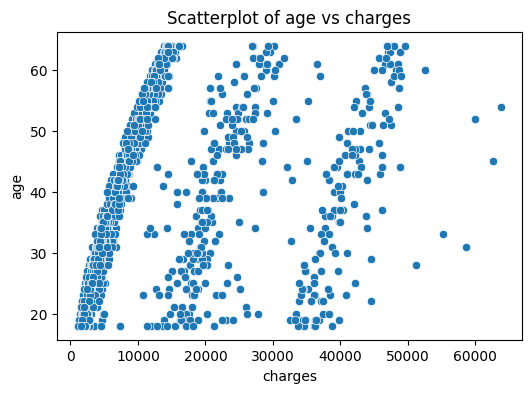

In [ ]:
plot_boxplot(df, "age")

Age is directly correlated to chareges however,there seems to be three bands , we need to dig further to understand what is the reason for these bands.

*Generally, In the insurance dataset, charges is often driven heavily by whether someone is a smoker or not, and how many children they have.

* Non-smokers tend to have relatively lower charges.

* Smokers have drastically higher charges (even at similar ages or BMIs).



## Try coloring (hue) the plot by smoker to verify:

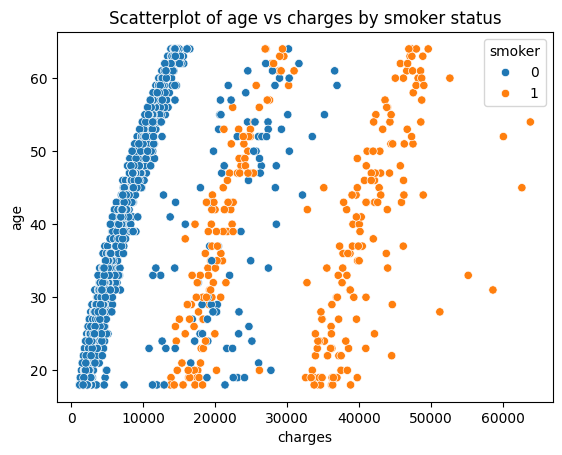

In [ ]:
sns.scatterplot(data=df, x='charges', y='age', hue='smoker')
plt.title('Scatterplot of age vs charges by smoker status')
plt.show()

* Clearly now we understand that why there are three bands in the scatter, smokers seems to be paying high charges which makes a lot of sense

* however , the bule points in the second band are stil a mestry

<Axes: xlabel='charges', ylabel='age'>

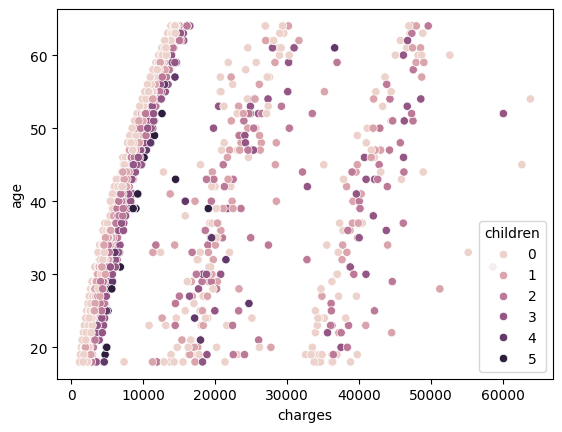

In [ ]:
sns.scatterplot(data=df, x='charges', y='age', hue='children')


* some of the unexplained blue points in the second band sseems to be families with 3 and 3+ children


<Axes: xlabel='charges', ylabel='age'>

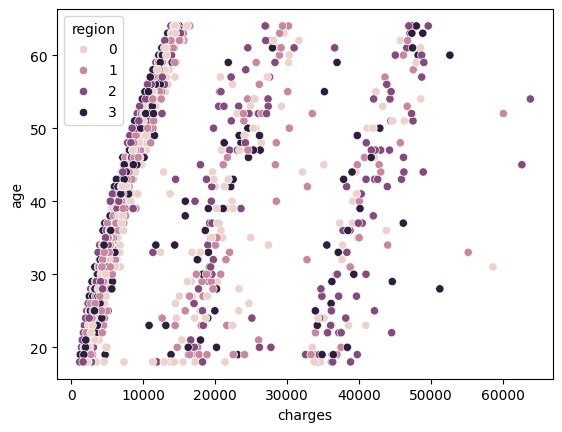

In [ ]:
sns.scatterplot(data=df, x='charges', y='age', hue='region')


In [ ]:
# df['region_name'] = df['region'].map(region_mapping)

# # 2. Filter for non-smokers
# non_smokers = df[df['smoker'] == 0]

# # 3. Group by region and compute average charges
# region_charge_stats = non_smokers.groupby('region_name')['charges'].agg(['mean', 'median', 'count']).reset_index()

# print(region_charge_stats)

# # 4. Optional: Plot the average charges for non-smokers by region
# plt.figure(figsize=(8,5))
# sns.barplot(x='region_name', y='mean', data=region_charge_stats)
# plt.title('Average Charges by Region (Non-Smokers)')
# plt.ylabel('Average Charges')
# plt.xlabel('Region')
# plt.show()

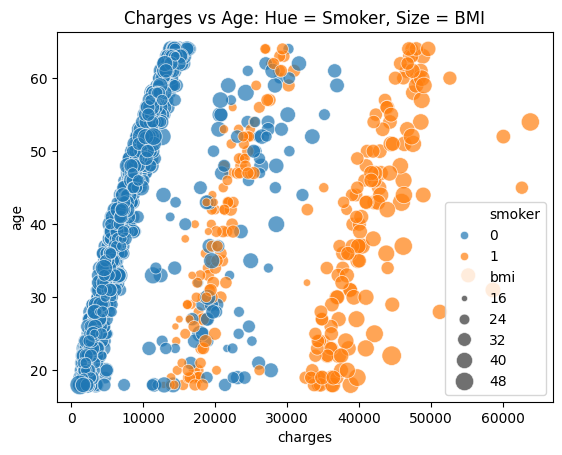

In [ ]:
sns.scatterplot(data=df, x='charges', y='age', hue='smoker', size='bmi', sizes=(20, 200), alpha=0.7)
plt.title('Charges vs Age: Hue = Smoker, Size = BMI')
plt.show()


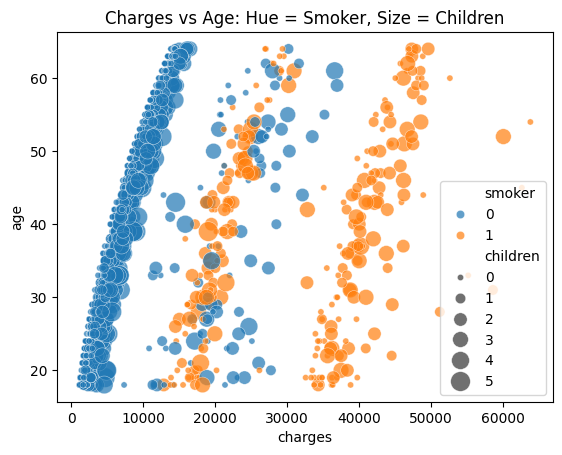

In [ ]:
sns.scatterplot(data=df, x='charges', y='age', hue='smoker', size='children', sizes=(20, 200), alpha=0.7)
plt.title('Charges vs Age: Hue = Smoker, Size = Children')
plt.show()


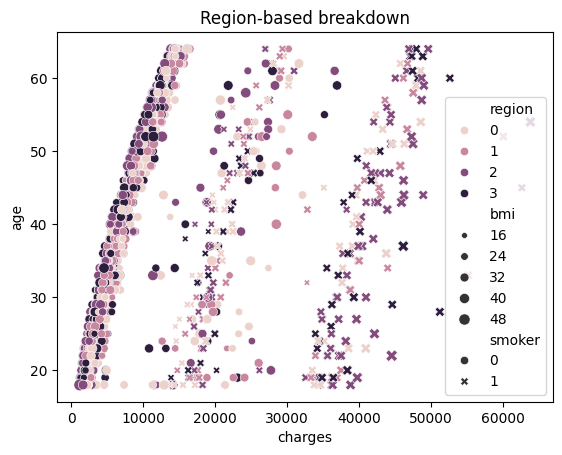

In [ ]:
sns.scatterplot(data=df, x='charges', y='age', hue='region', style='smoker', size='bmi')
plt.title("Region-based breakdown")
plt.show()

##the markers high in the second band which were not explained by smokers param are the ppl with high bmi who are paying high charges

In [ ]:
df['region']

,region
0,3
1,2
2,2
3,1
4,1
...,...
1333,1
1334,0
1335,2
1336,3


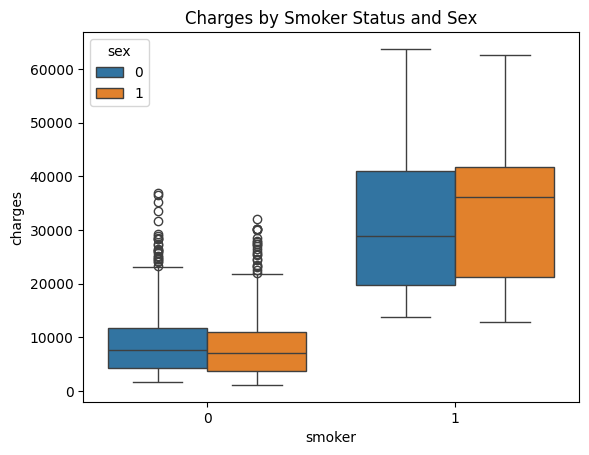

In [ ]:
sns.boxplot(data=df, x='smoker', y='charges', hue='sex')
plt.title('Charges by Smoker Status and Sex')
plt.show()


* Clearly smokers are paying higher charges


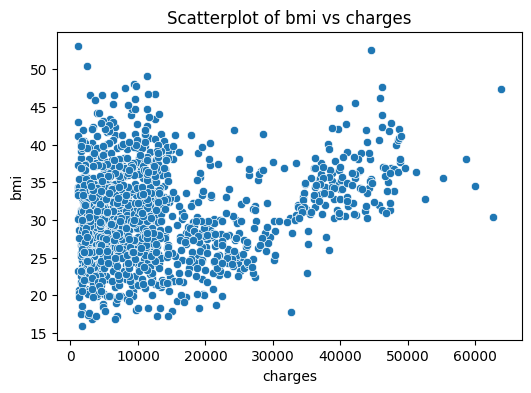

In [ ]:
plot_boxplot(df, "bmi")

<Axes: xlabel='charges', ylabel='bmi'>

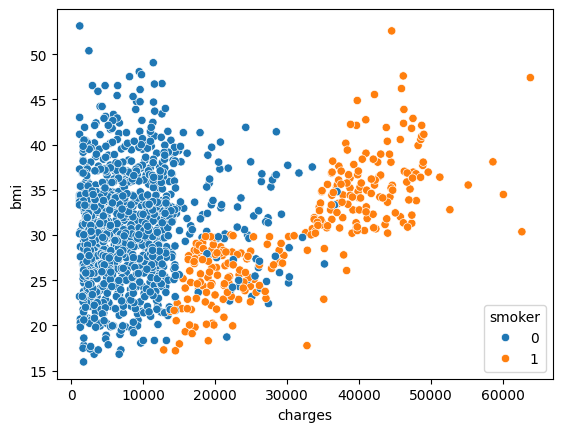

In [ ]:
sns.scatterplot(data=df, x="charges", y="bmi", hue="smoker")

<Axes: xlabel='charges', ylabel='bmi'>

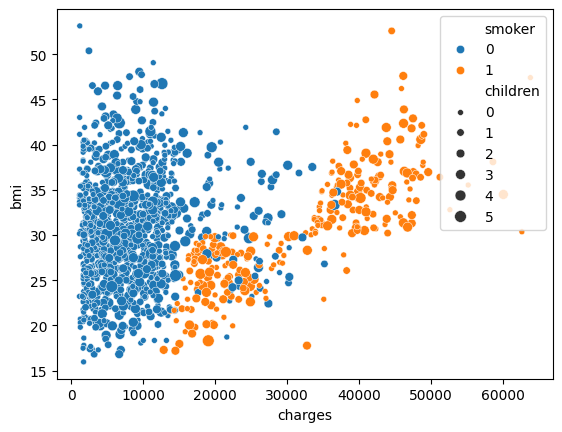

In [ ]:
sns.scatterplot(data=df, x="charges", y="bmi", hue="smoker", size="children")

* smokers pay higher
* some ppl with high age are still on the top left : these are the ppl with 0 children and non-smokers

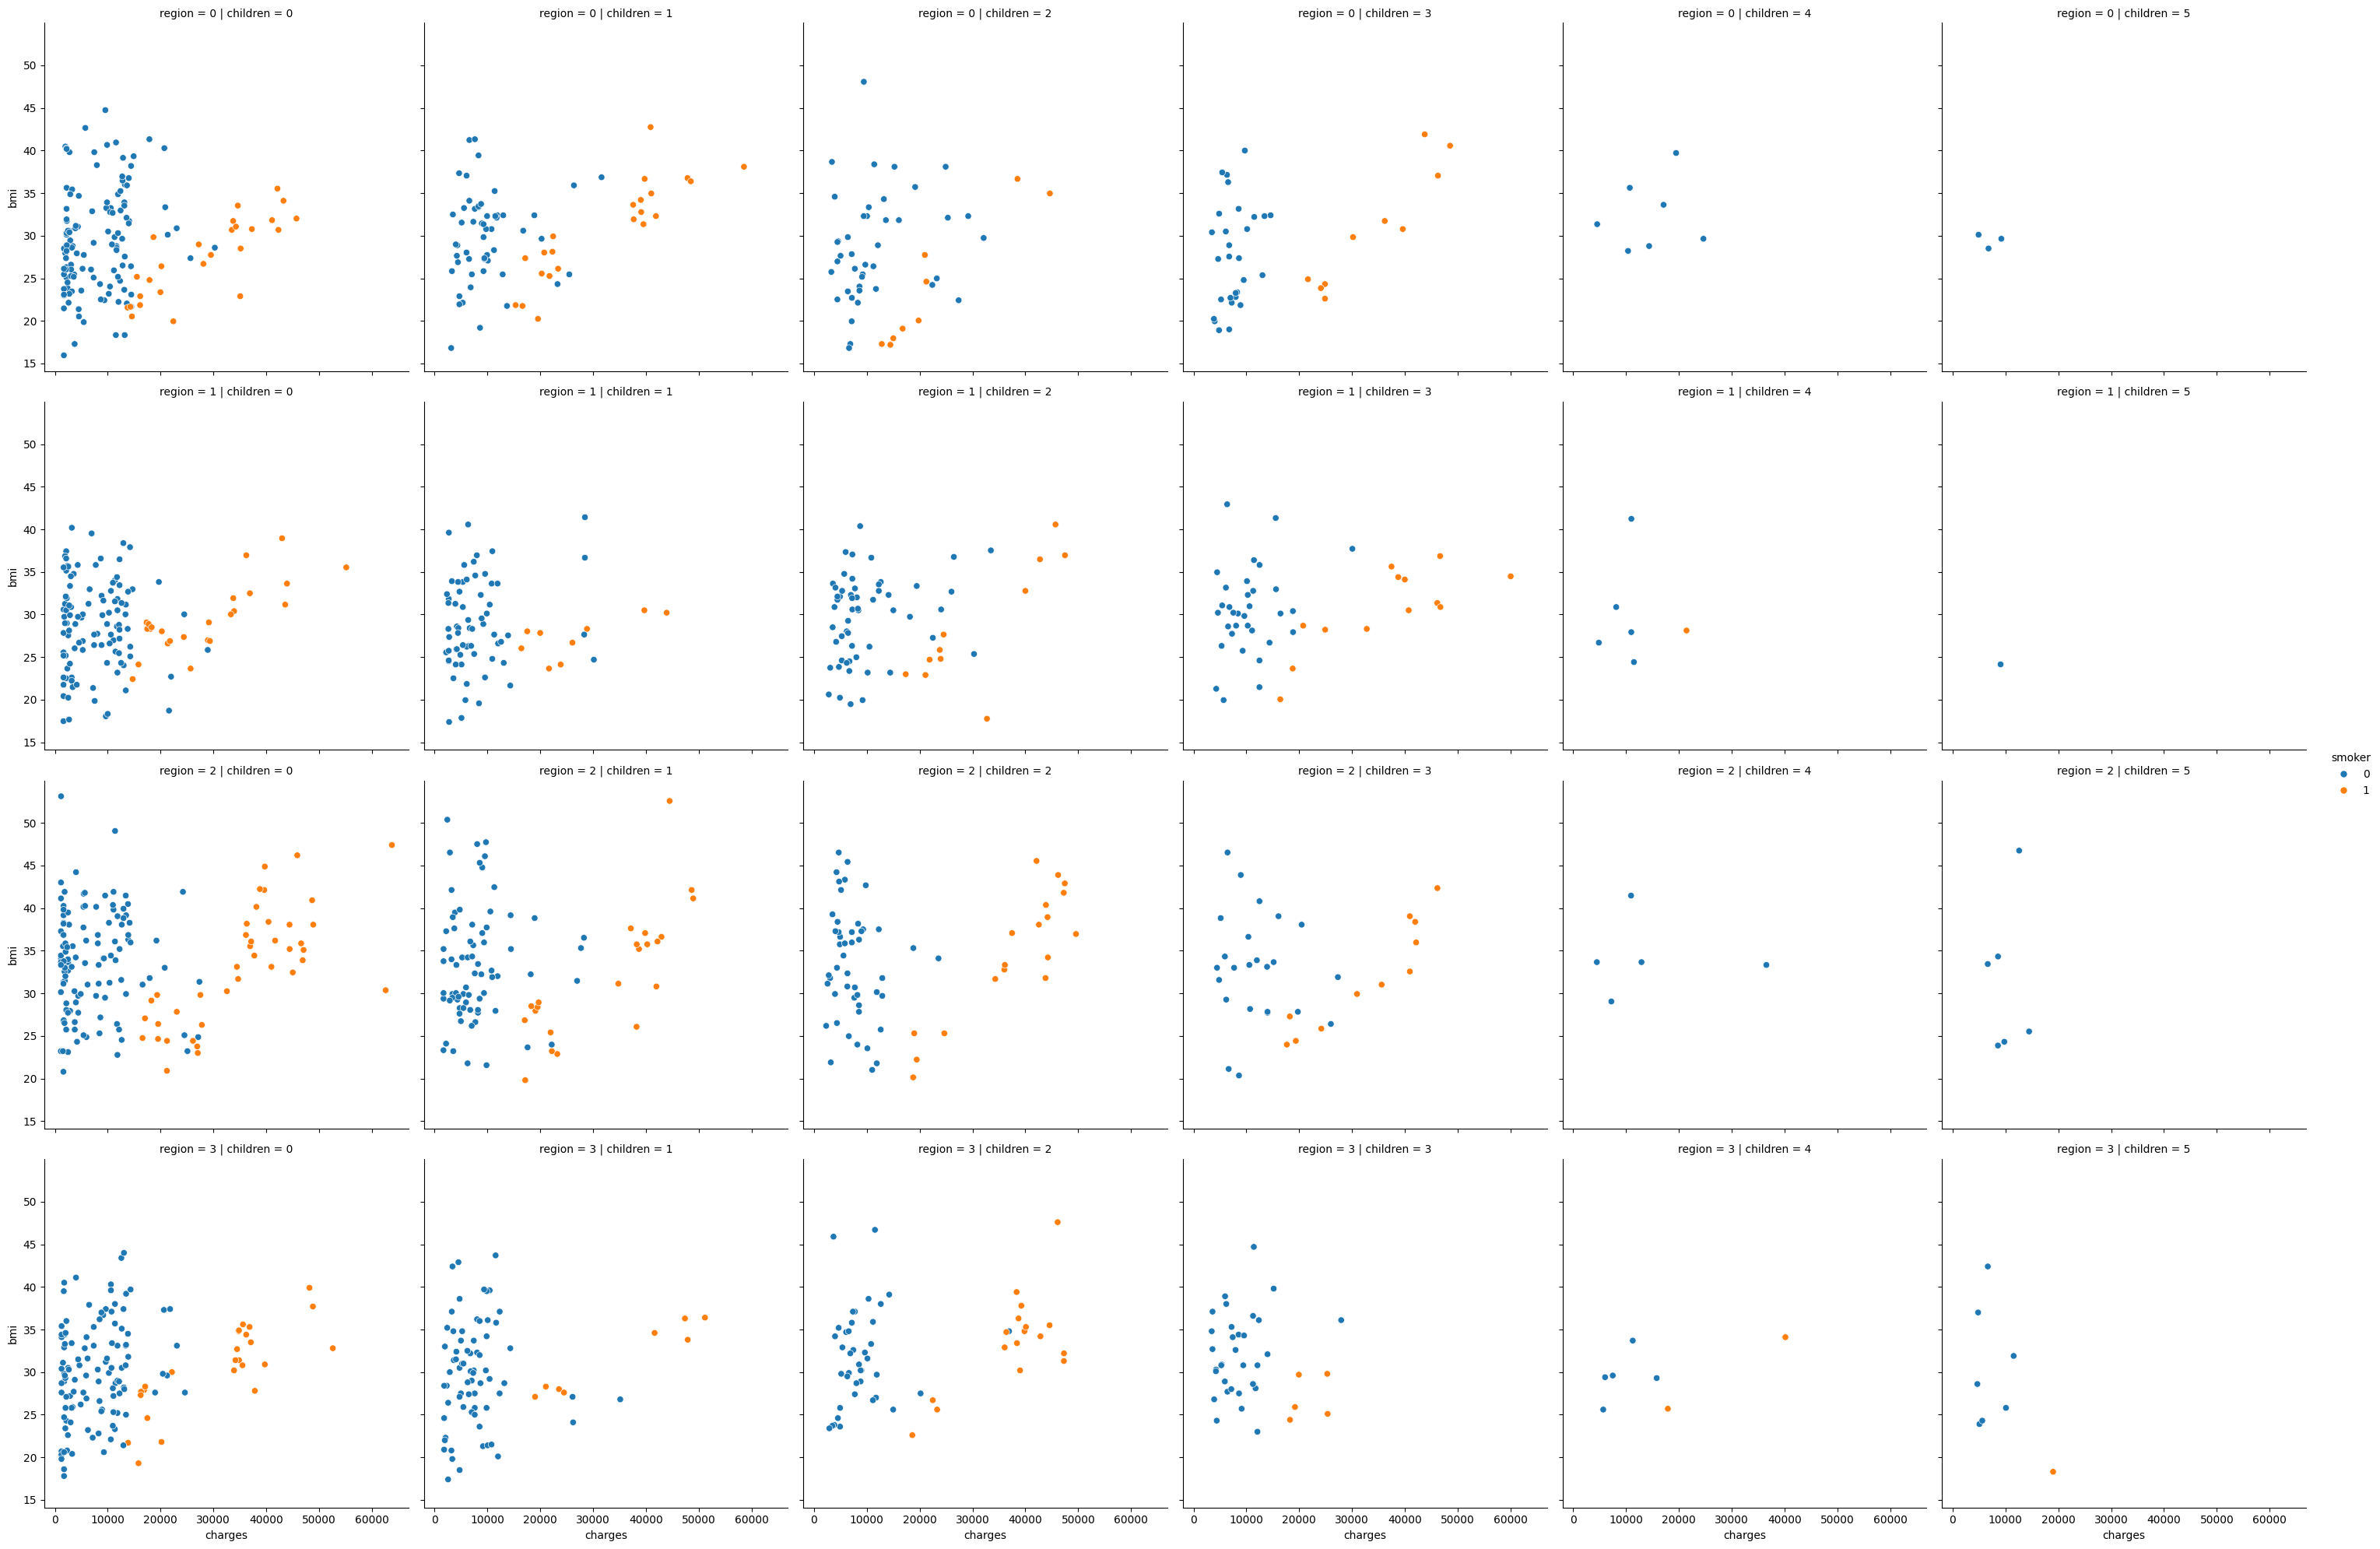

In [ ]:
sns.relplot(data=df, x="charges", y="bmi", hue="smoker", col="children", row="region")

#Bivariate - Categorical Vs Numerical

In [ ]:

def bivariate_cat_num(df, cat_col, num_col):
    """
    Draws both a box plot and a bar plot for bivariate analysis
    between a categorical and a numerical column.

    Parameters:
    - df: DataFrame
    - cat_col: Name of the categorical column (str)
    - num_col: Name of the numerical column (str)
    """
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))

    # Box Plot
    sns.boxplot(data=df, x=cat_col, y=num_col, palette='Set3', ax=axes[0])
    axes[0].set_title(f'Box Plot of {num_col} by {cat_col}')
    axes[0].set_xlabel(cat_col)
    axes[0].set_ylabel(num_col)
    axes[0].tick_params(axis='x', rotation=45)

    # Bar Plot
    sns.barplot(data=df, x=cat_col, y=num_col, estimator='mean', palette='Set2', ax=axes[1])
    axes[1].set_title(f'Bar Plot (Mean) of {num_col} by {cat_col}')
    axes[1].set_xlabel(cat_col)
    axes[1].set_ylabel(f'Mean {num_col}')
    axes[1].tick_params(axis='x', rotation=45)

    plt.tight_layout()
    plt.show()

<ipython-input-253-e1953f97ab58>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=cat_col, y=num_col, palette='Set3', ax=axes[0])
<ipython-input-253-e1953f97ab58>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x=cat_col, y=num_col, estimator='mean', palette='Set2', ax=axes[1])


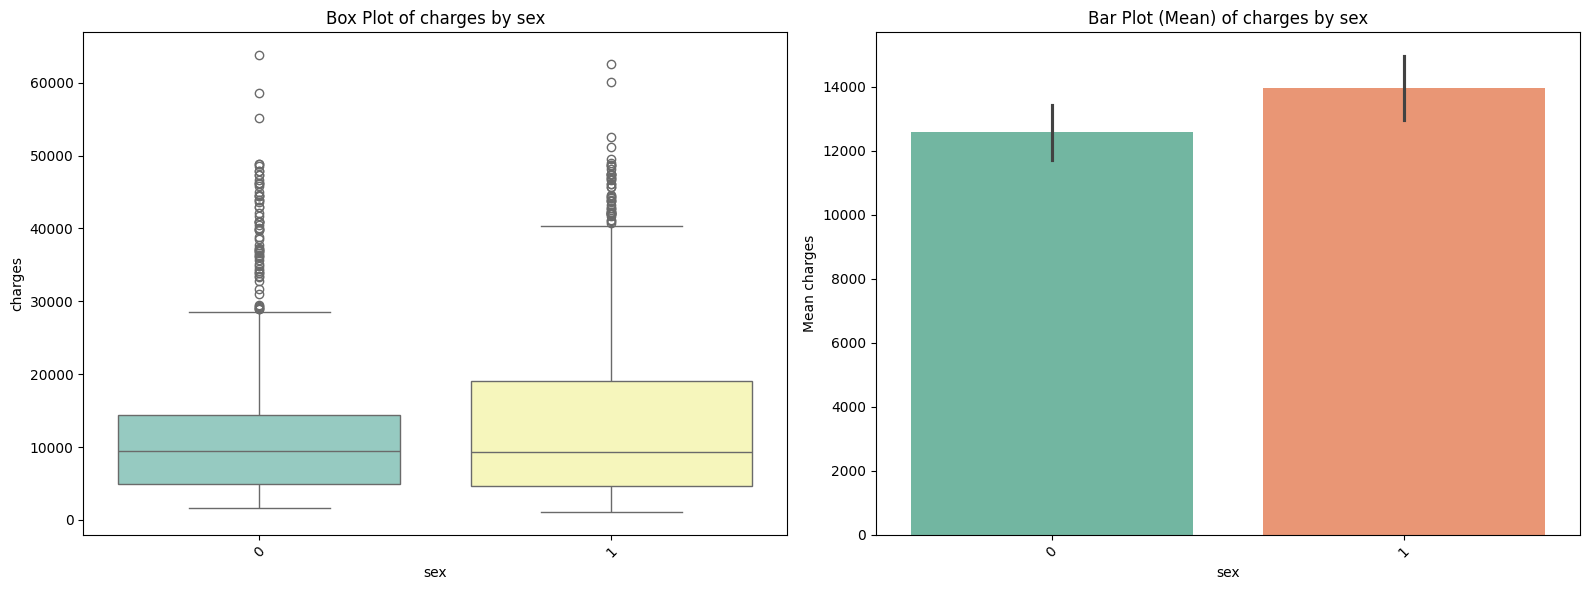

In [ ]:
bivariate_cat_num(df, 'sex', 'charges')


<ipython-input-253-e1953f97ab58>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=cat_col, y=num_col, palette='Set3', ax=axes[0])
<ipython-input-253-e1953f97ab58>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x=cat_col, y=num_col, estimator='mean', palette='Set2', ax=axes[1])


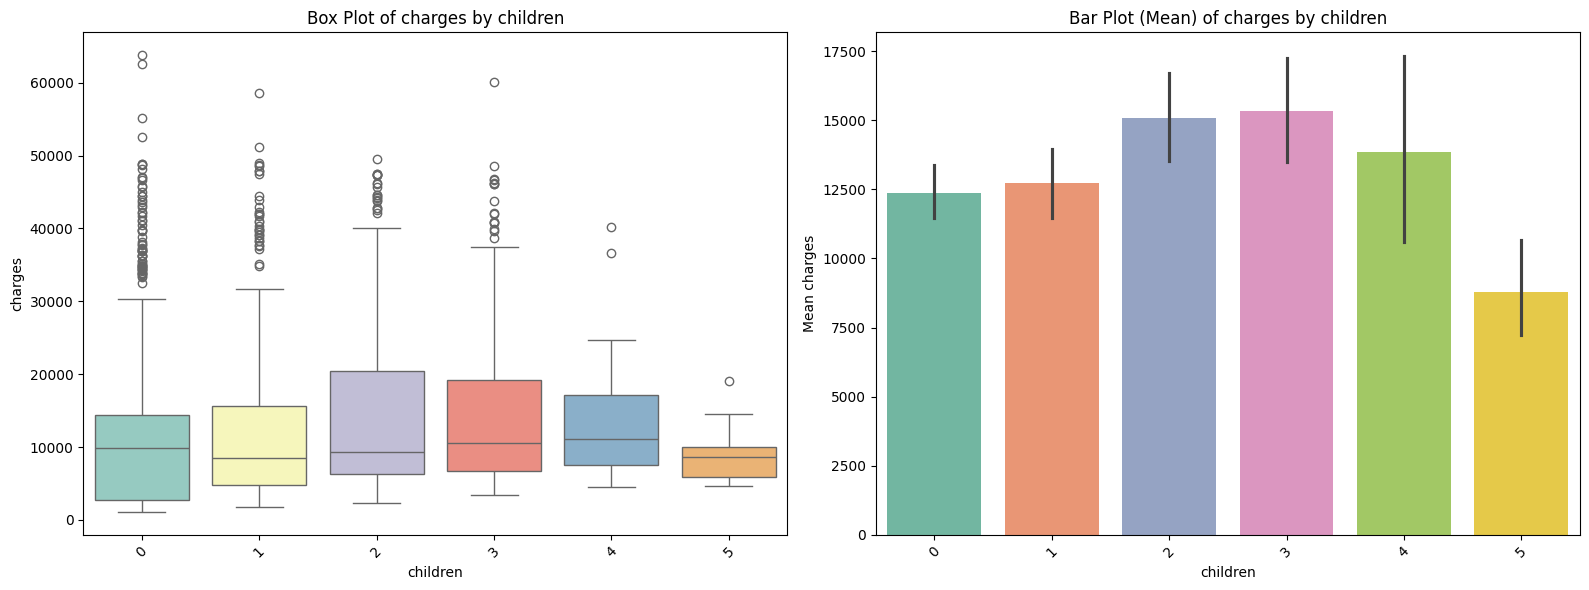

In [ ]:
bivariate_cat_num(df, 'children', 'charges')


In [ ]:
df['children'].value_counts(normalize=True) * 100

,proportion
children,
0,42.857143
1,24.233358
2,17.950636
3,11.742708
4,1.869858
5,1.346298


* very few instances in the data for 3 and 3+ children
* no of children is directly proportional to charges

<ipython-input-253-e1953f97ab58>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=cat_col, y=num_col, palette='Set3', ax=axes[0])
<ipython-input-253-e1953f97ab58>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x=cat_col, y=num_col, estimator='mean', palette='Set2', ax=axes[1])


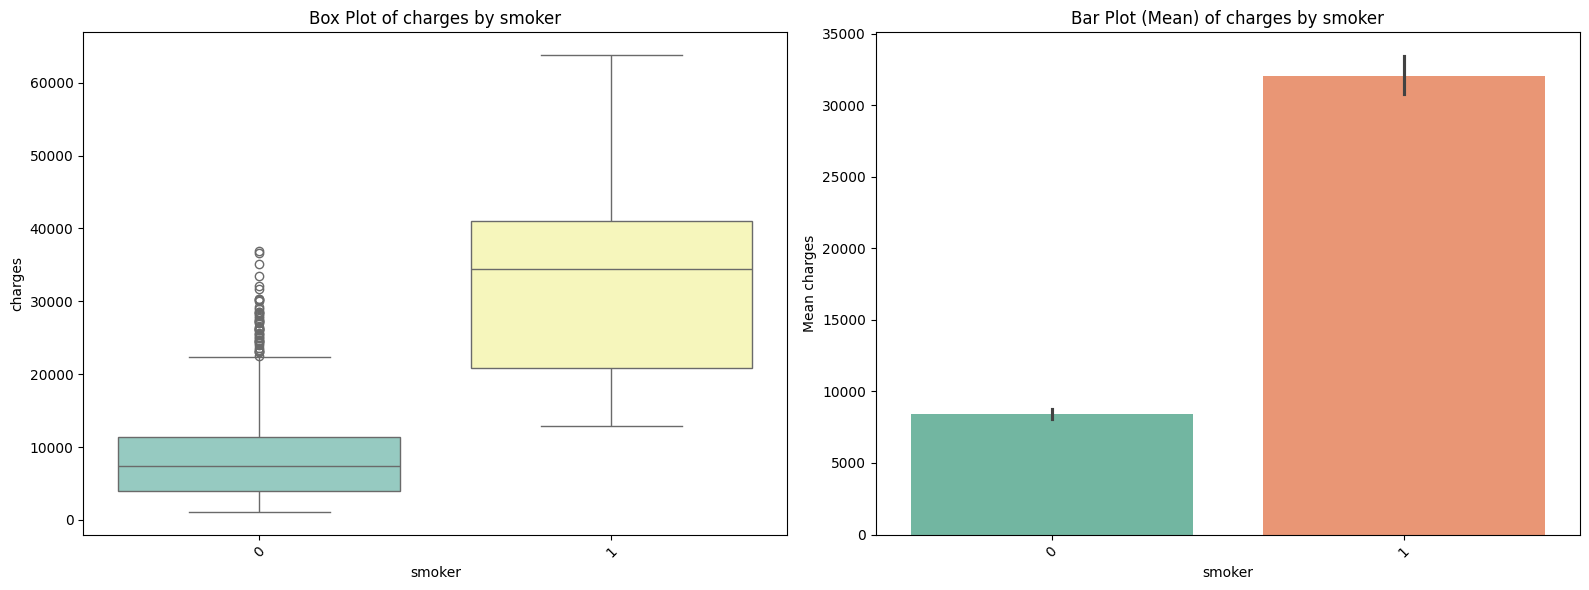

In [ ]:
bivariate_cat_num(df, 'smoker', 'charges')


<ipython-input-253-e1953f97ab58>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=cat_col, y=num_col, palette='Set3', ax=axes[0])
<ipython-input-253-e1953f97ab58>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x=cat_col, y=num_col, estimator='mean', palette='Set2', ax=axes[1])


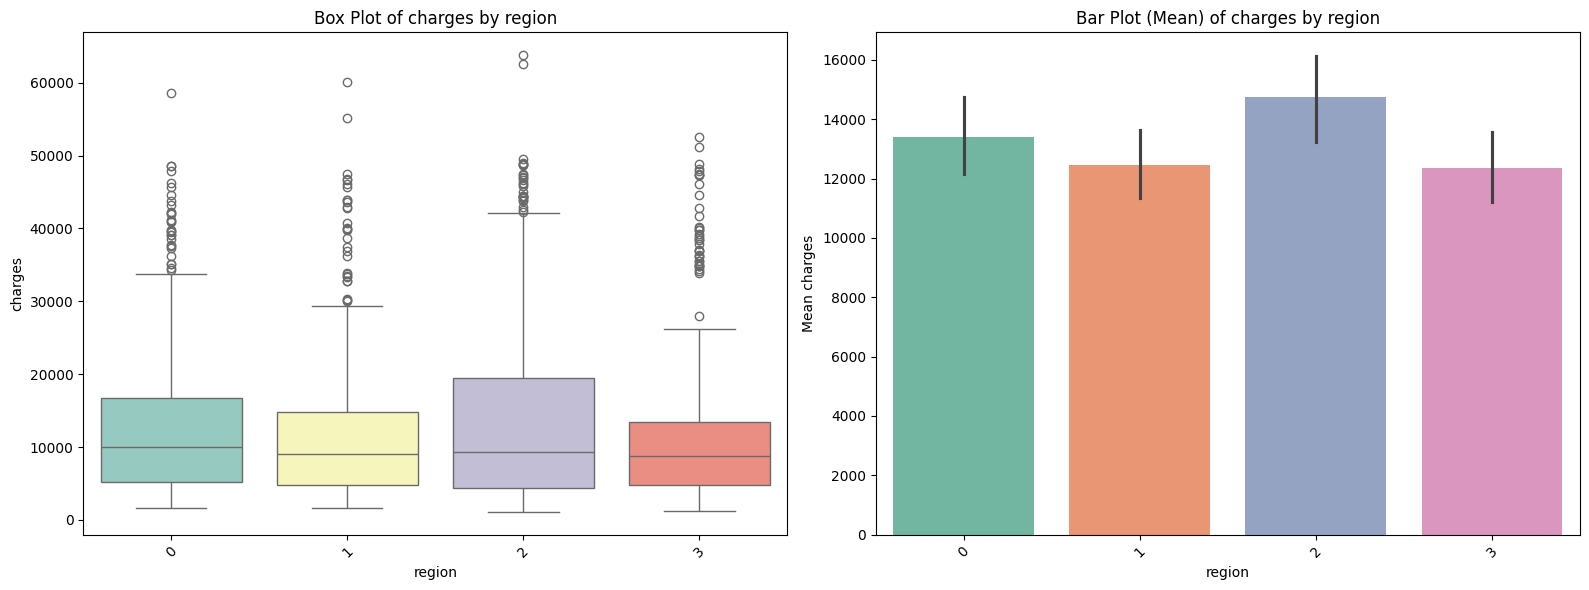

In [ ]:
bivariate_cat_num(df, 'region', 'charges')


In [ ]:
df['region'].value_counts(normalize=True)*100

,proportion
region,
2,27.225131
3,24.308153
1,24.233358
0,24.233358


* Even though the data is balanced across regions, there are visible differences in the mean and distribution of charges, suggesting region might be a meaningful feature to consider in modeling or analysis.

* Data is perfectly balanced for all regions:

### Q5. Perform Multivariate Analysis.
- Use pair plots to visualize relationships among all numerical variables.
- Write insights based on observed trends.

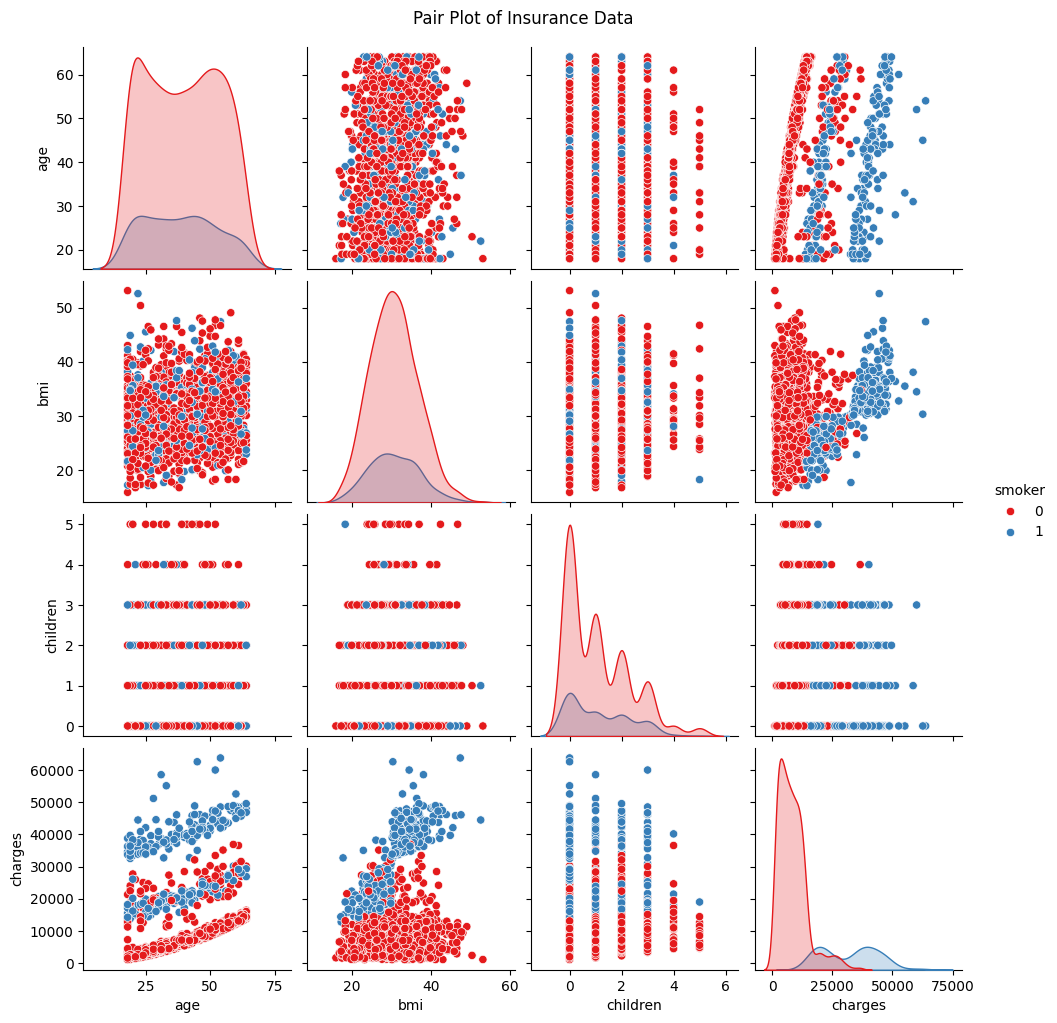

In [ ]:
# Load the dataset (assuming you've already loaded it as 'df')
# Select only numerical columns
num_cols = ['age', 'bmi', 'children', 'charges']

# Draw pairplot with hue based on a categorical feature (e.g., 'smoker')
sns.pairplot(df[num_cols + ['smoker']], hue='smoker', palette='Set1')
plt.suptitle('Pair Plot of Insurance Data', y=1.02)
plt.show()

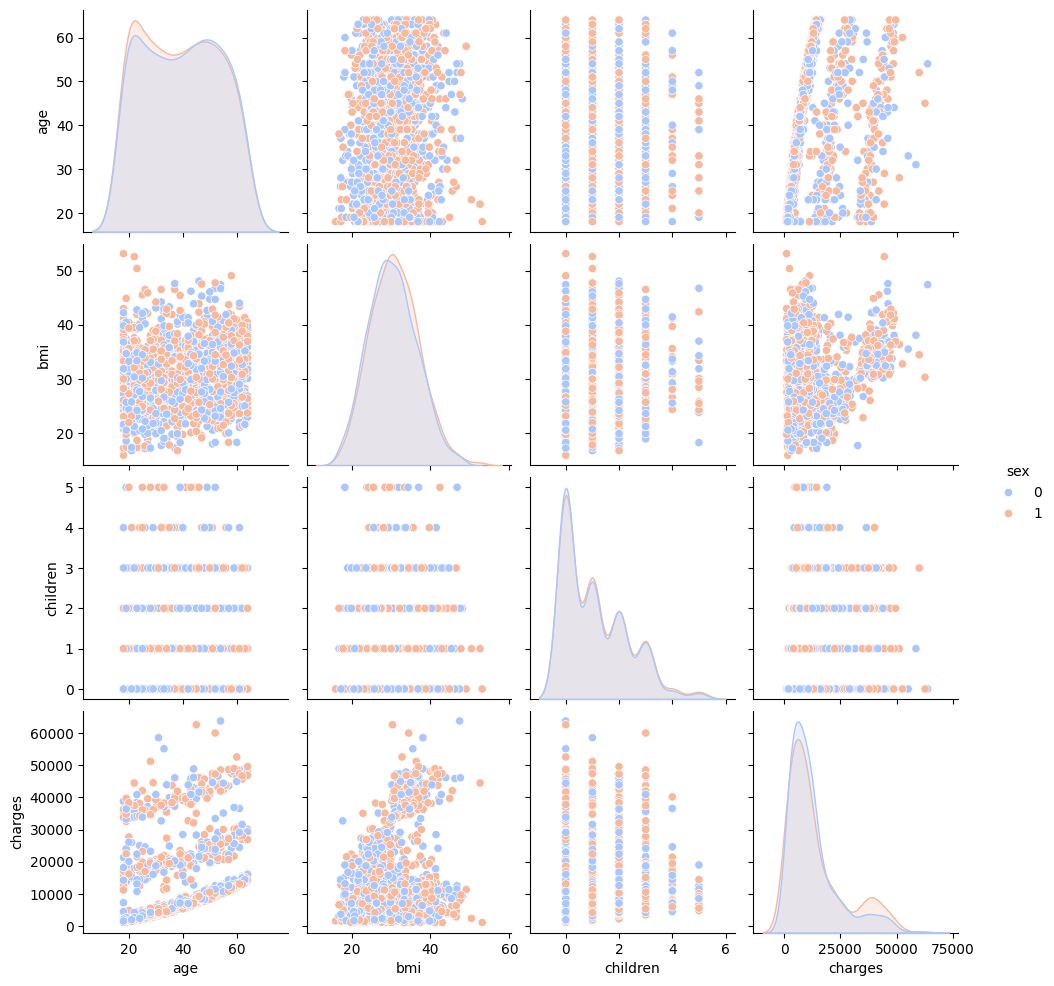

In [ ]:
sns.pairplot(df[num_cols + ['sex']], hue='sex', palette='coolwarm')


### Q6. Generate a Heatmap.
- Display the correlation matrix using a heatmap.
- Identify highly correlated features and provide interpretations.

---

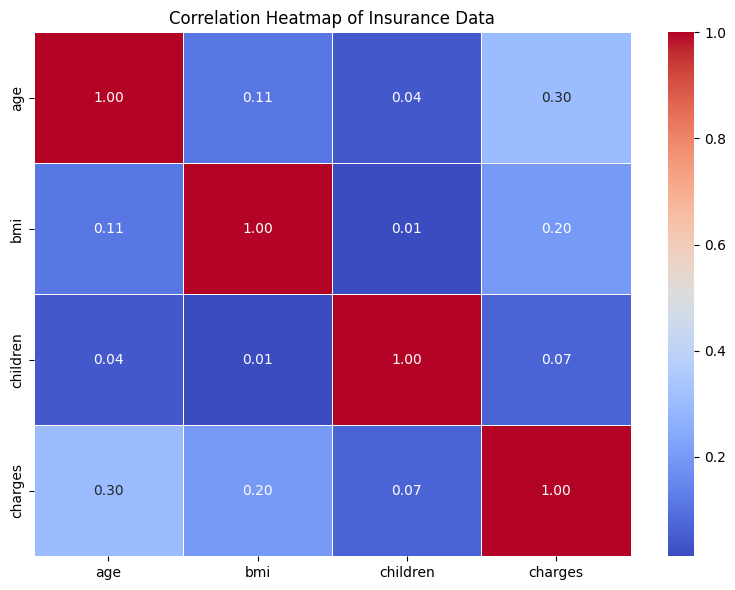

In [ ]:
# Select only numerical columns
num_cols = ['age', 'bmi', 'children', 'charges']

# Compute the correlation matrix
corr_matrix = df[num_cols].corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Insurance Data")
plt.tight_layout()
plt.show()

## Section 3: Model Building and Evaluation (20 Marks)
### Q7. Split the dataset into training and testing sets.
- Use an **80-20** or **70-30** split.

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


In [ ]:
df.region

,region
0,3
1,2
2,2
3,1
4,1
...,...
1333,1
1334,0
1335,2
1336,3


In [ ]:
# X_train

In [ ]:
X = df.drop(['charges'], axis = 1)
y = df.charges

X_train,X_test,y_train,y_test = train_test_split(X,y, random_state = 0)


### Q8. Build a **Linear Regression Model**.
- Train the model using the training dataset.
- Display the model coefficients and intercept.

In [ ]:
model = LinearRegression().fit(X_train,y_train)

y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)



### Q9. Evaluate the model on the test dataset.
- Compute **R-squared, Mean Absolute Error (MAE), Mean Squared Error (MSE), and Root Mean Squared Error (RMSE)**.


In [ ]:
train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)

In [ ]:

# Calculate metrics for test set
mse_test = mean_squared_error(y_test, y_pred_test)
mae_test = mean_absolute_error(y_test, y_pred_test)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test, y_pred_test)

# Calculate metrics for training set
mse_train = mean_squared_error(y_train, y_pred_train)
mae_train = mean_absolute_error(y_train, y_pred_train)
rmse_train = np.sqrt(mse_train)
r2_train = r2_score(y_train, y_pred_train)

# Adjusted R-squared for test set
n_test = X_test.shape[0]
p_test = X_test.shape[1]
adjusted_r2_test = 1 - (1 - r2_test) * ((n_test - 1) / (n_test - p_test - 1))



# Adjusted R-squared for test set
n_train = X_train.shape[0]
p_train = X_train.shape[1]
adjusted_r2_train = 1 - (1 - r2_train) * ((n_train - 1) / (n_train - p_train - 1))


In [ ]:

# ====================  Training Metrics ====================
print("\n" + "="*60)
print(" TRAINING METRICS".center(60))
print("="*60)
print(f" Score:                     {train_score:.4f}")
print(f" Mean Squared Error (MSE):  {mse_train:.4f}")
print(f" Mean Absolute Error (MAE): {mae_train:.4f}")
print(f" Root Mean Squared Error:   {rmse_train:.4f}")
print(f" R-squared (R²):            {r2_train:.4f}")
print(f" Adjusted R-squared:        {adjusted_r2_train:.4f}")

# ====================  Testing Metrics =====================
print("\n" + "="*60)
print(" TESTING METRICS".center(60))
print("="*60)
print(f" Score:                     {test_score:.4f}")
print(f" Mean Squared Error (MSE):  {mse_test:.4f}")
print(f" Mean Absolute Error (MAE): {mae_test:.4f}")
print(f" Root Mean Squared Error:   {rmse_test:.4f}")
print(f" R-squared (R²):            {r2_test:.4f}")
print(f" Adjusted R-squared:        {adjusted_r2_test:.4f}")
print("="*60 + "\n")




                      TRAINING METRICS                      
 Score:                     0.7518
 Mean Squared Error (MSE):  35259840.9490
 Mean Absolute Error (MAE): 3983.7557
 Root Mean Squared Error:   5937.9997
 R-squared (R²):            0.7518
 Adjusted R-squared:        0.7503

                       TESTING METRICS                      
 Score:                     0.7438
 Mean Squared Error (MSE):  40864653.7196
 Mean Absolute Error (MAE): 4376.9078
 Root Mean Squared Error:   6392.5467
 R-squared (R²):            0.7438
 Adjusted R-squared:        0.7392



### Q10. Interpret the Error Metrics.
- Explain the significance of each metric in evaluating model performance.
- What do these values indicate about the model's accuracy?

---



---

###  **TRAINING METRICS Interpretation**

* **R-squared (R²): 0.7518**

  * The model explains **\~75.18%** of the variance in the training target variable.
  * This indicates a **fairly strong** fit to the training data.

* **Adjusted R-squared: 0.7503**

  * Very close to R², suggesting that most added features are meaningful.
  * Adjusted R² accounts for the number of predictors; its closeness to R² implies **no significant overfitting**.

* **MSE: 35,259,840.95 | RMSE: 5,937.99**

  * These indicate the average squared and root errors, respectively.
  * RMSE tells you that the model's average prediction error is around **₹5938** (if your target is in INR or dollars etc.).

* **MAE: 3,983.76**

  * On average, predictions are **₹3984 off** from actual values.
  * Lower than RMSE — implies errors are not heavily skewed by large outliers.

---

###  **TESTING METRICS Interpretation**

* **R-squared (R²): 0.7438**

  * On unseen data, the model still explains about **74.38%** of the variation — **very close** to training R².
  * Indicates **good generalization**.

* **Adjusted R-squared: 0.7392**

  * Slightly lower, but again shows minimal overfitting.

* **MSE: 40,864,653.72 | RMSE: 6,392.55**

  * Testing RMSE is about **₹6393**, slightly higher than training RMSE — this is normal and acceptable.

* **MAE: 4,376.91**

  * On average, test predictions are off by **₹4377**, only a bit worse than on training data.

---

###  **Overall Interpretation**

* The model performs **consistently** across both training and test sets.
* It explains **\~75% of variance**, has **reasonable error magnitudes**, and **does not appear to overfit**.
* PloyRegression can give better results


## Section 4: Model Interpretation and Conclusion (10 Marks)
### Q11. Explain the significance of each feature in predicting insurance charges.
- Which features are most impactful?
- How does smoking status affect the charges?

In [ ]:
# Charges are affected by smoker and children status In the insurance dataset, charges is often driven heavily by whether someone is a smoker or not, and how many children they have.

# Non-smokers tend to have relatively lower charges.

# Smokers have drastically higher charges (even at similar ages or BMIs).

### Q12. What are the limitations of your model?
- Discuss any assumptions of **Linear Regression** that might not hold in this dataset.
- Suggest improvements for better prediction accuracy.

---

In [ ]:
# we can try polynomial regression for better accuracy as linear regression might not be able to capture non-linear relationships

## Submission Instructions
- Submit the **Jupyter Notebook (.ipynb)** with well-commented code and explanations.
- Provide visualizations and observations for each step.
- Ensure the notebook runs without errors before submission.

**Total Marks: 50**

---

**==================================================================================================**

#**ASSIGNMENT 2**

**========================================================================================================**

### **Instructions**

####  **Part 1: Polynomial Regression (10 Marks)**
1. Use the same **insurance dataset** from Assignment 1.
2. Perform **feature engineering** to include **polynomial features** (e.g., age², BMI², age × BMI, etc.).
3. Fit a **Polynomial Regression** model using `sklearn`'s `PolynomialFeatures` and `LinearRegression`.
4. Compare the performance of the polynomial regression model with your previous linear regression model using:
   - R² score
   - RMSE or MAE
   - Train vs. Test performance
5. Comment on **overfitting/underfitting**, if any.


In [ ]:


# Step 1: Choose the degree of the polynomial
degree = 2  # You can increase this for higher-degree polynomials

# Step 2: Transform the original features to polynomial features
poly = PolynomialFeatures(degree=degree)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Step 3: Train the LinearRegression model on polynomial features
model = LinearRegression().fit(X_train_poly, y_train)

# Step 4: Make predictions
y_pred_train = model.predict(X_train_poly)
y_pred_test = model.predict(X_test_poly)

# Step 5: Evaluate the model
print("Train R²:", r2_score(y_train, y_pred_train))
print("Test R²:", r2_score(y_test, y_pred_test))
print("Train MSE:", mean_squared_error(y_train, y_pred_train))
print("Test MSE:", mean_squared_error(y_test, y_pred_test))


Train R²: 0.8477609367740837
Test R²: 0.8380068395344444
Train MSE: 21623132.0116032
Test MSE: 25843171.945178844


**comparison of the linear regression (LR) and polynomial regression (Poly) results across the given metrics:**

### 1. **R² Score (Coefficient of Determination):**

* **Linear Regression (LR):**

  * **Train R²**: 0.7518
  * **Test R²**: 0.7438
* **Polynomial Regression (Poly):**

  * **Train R²**: 0.8478
  * **Test R²**: 0.8380
* **Comparison:**

  * Polynomial regression has a significantly higher R² score, both on training (0.8478 vs. 0.7518) and testing (0.8380 vs. 0.7438). This suggests that polynomial regression is better at explaining the variance in the dataset.

### 2. **Root Mean Squared Error (RMSE):**

* **Linear Regression (LR):**

  * **Train RMSE**: 5937.9997
  * **Test RMSE**: 6392.5467
* **Polynomial Regression (Poly):**

  * **Train RMSE**: 4650.0680
  * **Test RMSE**: 5083.6180
* **Comparison:**

  * Polynomial regression has a lower RMSE compared to linear regression, both in training (4650.0680 vs. 5937.9997) and testing (5083.6180 vs. 6392.5467). This indicates that the polynomial model is better at minimizing the error between the predicted and actual values.

### 3. **Mean Absolute Error (MAE):**

* **Linear Regression (LR):**

  * **Train MAE**: 3983.7557
  * **Test MAE**: 4376.9078
* **Polynomial Regression (Poly):**

  * **Train MAE**: 2721.4567
  * **Test MAE**: 3055.0207
* **Comparison:**

  * Polynomial regression also shows a lower MAE compared to linear regression in both training (2721.4567 vs. 3983.7557) and testing (3055.0207 vs. 4376.9078). This indicates that polynomial regression produces predictions that are closer to the actual values.

### 4. **Train vs. Test Performance:**

* **Linear Regression (LR):**

  * The performance drop from training to testing (R² from 0.7518 to 0.7438, RMSE from 5937.9997 to 6392.5467) is moderate.
* **Polynomial Regression (Poly):**

  * Polynomial regression also shows a slight drop in performance from training to testing (R² from 0.8478 to 0.8380, RMSE from 4650.0680 to 5083.6180), but the drop is smaller compared to linear regression.
* **Comparison:**

  * Both models show some overfitting as the training performance is better than testing performance. However, the polynomial regression model exhibits a smaller difference in performance between training and testing, suggesting it generalizes better than linear regression.

### Summary of Insights:

* **Polynomial Regression** outperforms **Linear Regression** in terms of all metrics:

  * Higher R² scores (better explained variance).
  * Lower RMSE and MAE (better accuracy in predictions).
  * Smaller drop in performance between training and testing, indicating better generalization.

Thus, the polynomial regression model is more suitable for this particular dataset, likely capturing non-linear relationships better than the linear regression model.


####  **Part 2: Regularization (Ridge and Lasso) (10 Marks)**
1. Apply **Ridge** and **Lasso** regression to the polynomial features.
2. Use **cross-validation** to evaluate model performance.
3. Explain the effect of **regularization** in controlling overfitting, and compare model coefficients.



##**To find out which degree fits the best for the given insurance dataset we can try cross validation**

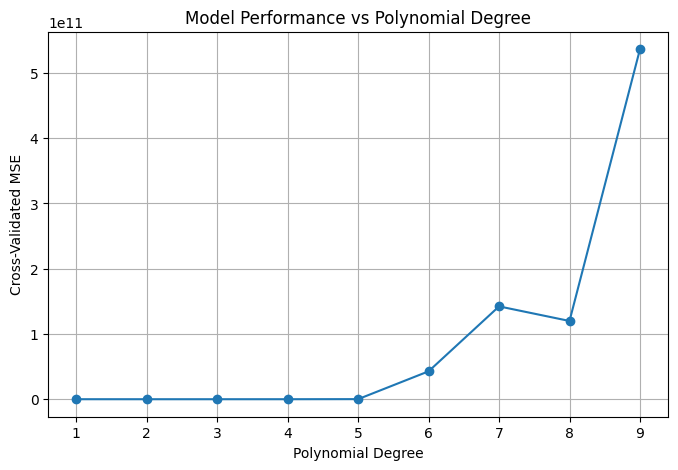

Best degree based on CV MSE: 2


In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
import numpy as np
import matplotlib.pyplot as plt

# Range of degrees to test
degrees = range(1, 10)
mean_mse = []

for d in degrees:
    poly = PolynomialFeatures(degree=d)
    X_poly = poly.fit_transform(X_train)

    model = LinearRegression()

    # Negative MSE used since cross_val_score tries to maximize score
    scores = cross_val_score(model, X_poly, y_train, scoring='neg_mean_squared_error', cv=5)
    mean_mse.append(-scores.mean())

# Plot MSE vs Degree
plt.figure(figsize=(8, 5))
plt.plot(degrees, mean_mse, marker='o')
plt.xlabel('Polynomial Degree')
plt.ylabel('Cross-Validated MSE')
plt.title('Model Performance vs Polynomial Degree')
plt.grid(True)
plt.show()

# Best degree
best_degree = degrees[np.argmin(mean_mse)]
print(f"Best degree based on CV MSE: {best_degree}")


In [ ]:
mean_mse

[np.float64(35831205.11024262),
 np.float64(22694196.746290185),
 np.float64(24022887.09831879),
 np.float64(33762016.784047276),
 np.float64(161412360.11172283),
 np.float64(42797456128.821594),
 np.float64(142263283759.25055),
 np.float64(119916210887.98262),
 np.float64(536264490294.48694)]

##**From the above code we know that best degree to use is 2**

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Create polynomial features of degree 2
degree = 2
poly = PolynomialFeatures(degree=degree)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Train the model
model = LinearRegression().fit(X_train_poly, y_train)

# Predict on training and testing data
y_pred_train = model.predict(X_train_poly)
y_pred_test = model.predict(X_test_poly)

# Training metrics
train_score = model.score(X_train_poly, y_train)
mse_train = mean_squared_error(y_train, y_pred_train)
mae_train = mean_absolute_error(y_train, y_pred_train)
rmse_train = np.sqrt(mse_train)
r2_train = r2_score(y_train, y_pred_train)
adjusted_r2_train = 1 - (1 - r2_train) * ((len(y_train) - 1) / (len(y_train) - X_train_poly.shape[1] - 1))

# Testing metrics
test_score = model.score(X_test_poly, y_test)
mse_test = mean_squared_error(y_test, y_pred_test)
mae_test = mean_absolute_error(y_test, y_pred_test)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test, y_pred_test)
adjusted_r2_test = 1 - (1 - r2_test) * ((len(y_test) - 1) / (len(y_test) - X_test_poly.shape[1] - 1))

# ====================  Training Metrics ====================
print("\n" + "="*60)
print(" TRAINING METRICS".center(60))
print("="*60)
print(f" Score:                     {train_score:.4f}")
print(f" Mean Squared Error (MSE):  {mse_train:.4f}")
print(f" Mean Absolute Error (MAE): {mae_train:.4f}")
print(f" Root Mean Squared Error:   {rmse_train:.4f}")
print(f" R-squared (R²):            {r2_train:.4f}")
print(f" Adjusted R-squared:        {adjusted_r2_train:.4f}")

# ====================  Testing Metrics =====================
print("\n" + "="*60)
print(" TESTING METRICS".center(60))
print("="*60)
print(f" Score:                     {test_score:.4f}")
print(f" Mean Squared Error (MSE):  {mse_test:.4f}")
print(f" Mean Absolute Error (MAE): {mae_test:.4f}")
print(f" Root Mean Squared Error:   {rmse_test:.4f}")
print(f" R-squared (R²):            {r2_test:.4f}")
print(f" Adjusted R-squared:        {adjusted_r2_test:.4f}")
print("="*60 + "\n")



                      TRAINING METRICS                      
 Score:                     0.8478
 Mean Squared Error (MSE):  21623132.0116
 Mean Absolute Error (MAE): 2721.4567
 Root Mean Squared Error:   4650.0680
 R-squared (R²):            0.8478
 Adjusted R-squared:        0.8434

                       TESTING METRICS                      
 Score:                     0.8380
 Mean Squared Error (MSE):  25843171.9452
 Mean Absolute Error (MAE): 3055.0207
 Root Mean Squared Error:   5083.6180
 R-squared (R²):            0.8380
 Adjusted R-squared:        0.8232



#### **Part 3: Hyperparameter Tuning (10 Marks )**
1. Use `GridSearchCV` or `RandomizedSearchCV` to find the optimal value of:
   - `alpha` (regularization strength) for Ridge/Lasso
   - Polynomial **degree**
2. Evaluate and report the best combination of hyperparameters.



In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge  # or Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import GridSearchCV, learning_curve, validation_curve
import numpy as np
import matplotlib.pyplot as plt

# Define pipeline
pipe = Pipeline([
    ('poly', PolynomialFeatures()),
    ('ridge', Ridge())  # swap with Lasso() if needed
])

# Hyperparameter grid
param_grid = {
    'poly__degree': [1, 2, 3, 4],
    'ridge__alpha': [0.01, 0.1, 1, 10, 100]
}

# Grid Search
grid_search = GridSearchCV(pipe, param_grid, cv=5, scoring='r2', return_train_score=True)
grid_search.fit(X_train, y_train)


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=2.93308e-19): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=2.90084e-19): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=2.82992e-19): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=3.08878e-19): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarnin

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('poly', PolynomialFeatures()),
                                       ('ridge', Ridge())]),
             param_grid={'poly__degree': [1, 2, 3, 4],
                         'ridge__alpha': [0.01, 0.1, 1, 10, 100]},
             return_train_score=True, scoring='r2')

https://scikit-learn.org/1.3/tutorial/statistical_inference/putting_together.html

###  Does GridSearchCV apply **all parameters** to **all models** in the pipeline?

**No.** GridSearchCV applies parameters **only to the specific step** in the pipeline, using **namespacing** with double underscores (`__`).

---

###  How it works:

Given this pipeline:

```python
pipe = Pipeline([
    ('poly', PolynomialFeatures()),
    ('ridge', Ridge())
])
```

You define a `param_grid` like this:

```python
param_grid = {
    'poly__degree': [1, 2, 3, 4],      # for PolynomialFeatures
    'ridge__alpha': [0.01, 0.1, 1]     # for Ridge
}
```

* `poly__degree` is applied **only** to the `'poly'` step (i.e., `PolynomialFeatures`)
* `ridge__alpha` is applied **only** to the `'ridge'` step (i.e., `Ridge`)

Each model or transformer in the pipeline **only sees the parameters intended for it**, thanks to this namespacing.

---

### Summary

> **GridSearchCV does *not* apply all parameters to all steps in a pipeline.** It applies each parameter to the specific step it is named for using the `stepname__parameter` format.



STEP 2: Report best parameters & performance

In [ ]:
print("Best Parameters:", grid_search.best_params_)
print(f"Best CV R² Score: {grid_search.best_score_:.4f}")

# Evaluate on test set
best_model = grid_search.best_estimator_
test_r2 = best_model.score(X_test, y_test)
print(f"Test R² Score: {test_r2:.4f}")


Best Parameters: {'poly__degree': 2, 'ridge__alpha': 0.1}
Best CV R² Score: 0.8387
Test R² Score: 0.8381
